# Classification

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic regression</a></span><ul class="toc-item"><li><span><a href="#1-predictor" data-toc-modified-id="1-predictor-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1 predictor</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Accuracy-score" data-toc-modified-id="Accuracy-score-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Accuracy score</a></span></li></ul></li><li><span><a href="#Many-predictors" data-toc-modified-id="Many-predictors-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Many predictors</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Accuracy-score" data-toc-modified-id="Accuracy-score-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Accuracy score</a></span></li><li><span><a href="#predict_proba" data-toc-modified-id="predict_proba-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span><code>predict_proba</code></a></span></li><li><span><a href="#Setting-threshold-manually" data-toc-modified-id="Setting-threshold-manually-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Setting threshold manually</a></span></li></ul></li></ul></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Metrics</a></span><ul class="toc-item"><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Accuracy</a></span></li><li><span><a href="#Recall" data-toc-modified-id="Recall-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Recall</a></span></li><li><span><a href="#Precision" data-toc-modified-id="Precision-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Precision</a></span></li><li><span><a href="#F1-score" data-toc-modified-id="F1-score-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>F1 score</a></span></li><li><span><a href="#F_beta-score" data-toc-modified-id="F_beta-score-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>F_beta score</a></span></li></ul></li><li><span><a href="#Choosing-the-best-threshold" data-toc-modified-id="Choosing-the-best-threshold-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Choosing the best threshold</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Further-materials" data-toc-modified-id="Further-materials-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Further materials</a></span></li></ul></div>

As an introductory notebook, I am not using train and test split for metric evaluation  
But you should always do!

In [1]:
import pandas as pd
import seaborn as sns

 * Regression models are used when the target variable is **quantitative**: 
  - salaries
  - gas emissions
  - age of person in a picture
  - ...
 * **Classification** models are used when the target variable is **qualitative**: 
  - surviving (or not) the Titanic
  - paying back (or not) a loan
  - identifying a dog (or not) in a picture
  - deciding which one of 3 plant species is this one
  - ...

Metrics are specially important in classification problems!

You must understand the business goal in order to choose the appropiate metric.

## Data exploration

In [2]:
df = pd.read_csv("../datasets/breast_cancer.csv")

In [3]:
df.shape

(569, 31)

In [4]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [5]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'is_cancer'],
      dtype='object')

Documentation:  
a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

Target variable is `is_cancer`  
It is a categorical variable, taking possible values $0$ and $1$

In [6]:
df.is_cancer.sample(10)

200    0
426    0
344    0
495    0
185    0
271    0
44     1
541    0
430    1
257    1
Name: is_cancer, dtype: int64

<AxesSubplot:xlabel='is_cancer', ylabel='count'>

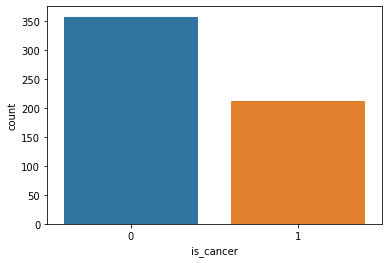

In [7]:
sns.countplot(x=df.is_cancer)

## Logistic regression

Logistic regression is the most frequently used classification algorithm

### 1 predictor

#### Model

Lets try to predict `is_cancer` using only as a predictor `mean_radius`

<AxesSubplot:xlabel='mean_radius', ylabel='is_cancer'>

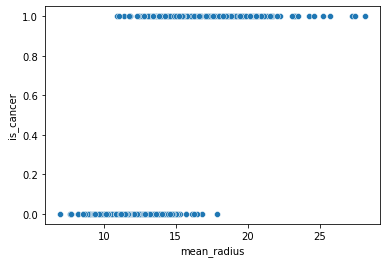

In [8]:
sns.scatterplot(x=df.mean_radius, y=df.is_cancer)

In [9]:
df2 = df[["mean_radius", "is_cancer"]].copy()

In [10]:
df2.sample(10).sort_values("mean_radius")

,mean_radius,is_cancer
538,7.729,0
222,10.180,0
303,10.490,0
130,12.190,0
135,12.770,1
214,14.190,1
472,14.920,0
27,18.610,1
256,19.550,1
129,19.790,1


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
df.shape

(569, 31)

In [13]:
log = LogisticRegression()

In [14]:
log.fit(
    X=df2[["mean_radius"]],
    y=df2.is_cancer
)

LogisticRegression()

A trained model is a *prediction machine*

How would it have performed with the 5 first patients?

In [15]:
df2[["mean_radius"]][:5]

,mean_radius
0,17.99
1,20.57
2,19.69
3,11.42
4,20.29


In [16]:
df.is_cancer[:5]

0    1
1    1
2    1
3    1
4    1
Name: is_cancer, dtype: int64

In [17]:
log.predict(df2[["mean_radius"]][:5])

array([1, 1, 1, 0, 1])

It would have acertado 4 out of 5

In [18]:
df2["prediction_cancer"] = log.predict(df2[["mean_radius"]])

In [19]:
df2.head(10)

,mean_radius,is_cancer,prediction_cancer
0,17.99,1,1
1,20.57,1,1
2,19.69,1,1
3,11.42,1,0
4,20.29,1,1
5,12.45,1,0
6,18.25,1,1
7,13.71,1,0
8,13.00,1,0
9,12.46,1,0


#### Accuracy score

How many predictions were correct?

In [20]:
df2["correct"] = (df2.is_cancer == df2.prediction_cancer)

In [21]:
df2.head(10)

,mean_radius,is_cancer,prediction_cancer,correct
0,17.99,1,1,True
1,20.57,1,1,True
2,19.69,1,1,True
3,11.42,1,0,False
4,20.29,1,1,True
5,12.45,1,0,False
6,18.25,1,1,True
7,13.71,1,0,False
8,13.00,1,0,False
9,12.46,1,0,False


Accuracy is the proportion of good predictions

In [22]:
df2.shape

(569, 4)

In [23]:
accuracy = df2.correct.sum() / df2.shape[0]

In [24]:
accuracy

0.8787346221441125

How many True/False Positives/Negatives do we have?

We build the confusion matrix

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/conf_matrix.png">

In [25]:
pd.crosstab(
    df2.is_cancer,
    df2.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,333,24
1,45,167


In [26]:
df.shape[0]

569

Equivalent to:

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(
    y_true=df2.is_cancer,
    y_pred=df2.prediction_cancer
)

array([[333,  24],
       [ 45, 167]])

Graphical interpretation

In [29]:
x = np.linspace(df.mean_radius.min(), df.mean_radius.max(), 100)
y = log.predict(x.reshape(-1, 1))

In [30]:
import matplotlib.pyplot as plt

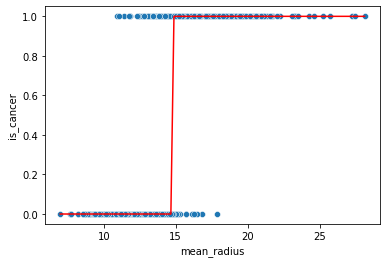

In [31]:
sns.scatterplot(x=df.mean_radius, y=df.is_cancer)
plt.plot(x, y, c= "red")

### Many predictors

#### Model

More iterations more time

In [36]:
log = LogisticRegression(max_iter=10000)

We use all variables **but** `is_cancer` to try and predict `is_cancer`

In [37]:
df3 = df.copy()

In [38]:
X = df3.drop("is_cancer", axis=1)
y = df3.is_cancer

In [39]:
log.fit(X, y)

LogisticRegression(max_iter=10000)

In [40]:
df3["prediction_cancer"] = log.predict(X)

In [41]:
df3b = df3[["is_cancer", "prediction_cancer"]].copy()

In [45]:
df3b.sample(10)

,is_cancer,prediction_cancer
207,1,1
361,0,0
433,1,1
242,0,0
32,1,1
531,0,0
122,1,1
8,1,1
255,1,1
215,1,0


In [47]:
df3b["correct"] = (df3b.is_cancer == df3.prediction_cancer)

In [48]:
df3b.sample(10)

,is_cancer,prediction_cancer,correct
183,0,0,True
431,0,0,True
397,0,0,True
438,0,0,True
105,1,1,True
333,0,0,True
472,0,0,True
106,0,0,True
318,0,0,True
164,1,1,True


Confusion matrix

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/conf_matrix.png">

In [49]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,348,9
1,15,197


In [50]:
acc = (348 + 197) / df3.shape[0]

In [51]:
acc

0.9578207381370826

#### Accuracy score

Accuracy is the proportion of good predictions

In [52]:
accuracy = df3b.correct.sum() / df3b.shape[0]

In [53]:
accuracy

0.9578207381370826

We got better accuracy using many predictors instead of one (as expected!)

#### `predict_proba`

Logistic regression actually predicts probabilities

We, as data scientists, want more precise information than just the *discrete* prediction 0, 1

In [65]:
df.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [64]:
df.shape

(569, 31)

In [67]:
log.predict(X)[15:20]

array([1, 1, 1, 1, 0])

In [68]:
log.predict_proba(X)[15:20].round(3)[:, 1]

array([1.   , 0.999, 1.   , 1.   , 0.014])

In [69]:
df3["prediction_proba_cancer"] = log.predict_proba(X)[:, 1]

In [70]:
df3b["prediction_proba_cancer"] = df3.prediction_proba_cancer

In [71]:
df3b.sample(10)

,is_cancer,prediction_cancer,correct,prediction_proba_cancer
557,0,0,True,0.000341
415,0,0,True,0.004711
499,1,1,True,0.999999
546,0,0,True,0.000068
34,1,1,True,0.999786
366,1,1,True,1.000000
111,0,0,True,0.001654
379,1,1,True,0.753047
354,0,0,True,0.000155
14,1,1,True,0.898446


Graphical interpretation in the case of ONE PREDICTOR

The curve gives the probability (Y) of cancer given the mean_radius (X)

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png">

#### Setting threshold manually

Default `predict` just computes `predict_proba` > 0.5

In [82]:
df3b.head()

,is_cancer,prediction_cancer,correct,prediction_proba_cancer
0,1,1,True,1.000000
1,1,1,True,0.999996
2,1,1,True,0.999999
3,1,1,True,0.681318
4,1,1,True,0.999764


Remember the original confusion matrix

In [81]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,348,9
1,15,197


Lets change the default threshold 0.5 and see how results change

Setting the threshold as 0.1 *invites* predictions to be Positive

Will False Positives increase?  
Will False Negatives increase?

**Example 1: low threshold**

In [83]:
threshold = 0.1

In [84]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_proba_cancer > threshold
)

prediction_proba_cancer,False,True
is_cancer,,
0,319,38
1,1,211


In [85]:
(319 + 211) / df.shape[0]

0.9314586994727593

Almost all positives were found (higher **recall**)

More false positives appeared (lower **precision**)

**Example 2: high threshold**

Recall 0.5 threshold crosstab

In [86]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,348,9
1,15,197


In [87]:
threshold = 0.8

In [88]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_proba_cancer > threshold
)

prediction_proba_cancer,False,True
is_cancer,,
0,356,1
1,28,184


Almost all predicted positives are true (higher **precision**)

We predicted 28 real cancers as False (low **recall**)

## Metrics

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

Remember: 
 * a metric should be chosen a-priori, with deep understanding of the problem. Then several models are trained and the one with best metric result is chosen
 * here we present different metrics for the same model as an exercise. The results (0.94, 0.92, 0.95 should by no means be compared!!)

On the left rectangle, Real Positives  
On the right rectangle, Real Negatives

Inside the circle, Predicted Positives  
Outside the circle, Predicted Negatives

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/buckets.png">

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/conf_matrix.png">

### Accuracy

 * It represents the proportion of samples predicted correctly
 * The most common metric for classification
 * Useful when:
  - dataset has balanced classes (similar proportion of True and False)
  - there is symmetry between True and False (for example, predicting "male" or "female")
 * **Often misused!!** since:
  - many problems are not symmetric (for example, cancer vs no cancer)
  - many problems have imbalanced classes (for example, terrorist vs no terrorist)
 * I do not like accuracy metric. Be alert!

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/accuracy.png">

In [90]:
df3b.head()

,is_cancer,prediction_cancer,correct,prediction_proba_cancer
0,1,1,True,1.000000
1,1,1,True,0.999996
2,1,1,True,0.999999
3,1,1,True,0.681318
4,1,1,True,0.999764


In [91]:
accuracy_score(
    y_true=df3b.is_cancer,
    y_pred=df3b.prediction_cancer
)

0.9578207381370826

### Recall

(also known as sensitivity) is the fraction of positive events that you predicted correctly, as shown below

It values as **crucial** to identify true instances (useful for cancer detection / terrorist detection airport)

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/recall.png">

In [92]:
recall_score(
    y_true=df3b.is_cancer,
    y_pred=df3b.prediction_cancer
)

0.9292452830188679

### Precision

is the fraction of predicted positives events that are actually positive as shown below

It values as **crucial** to **not** have False Positives (very aggresive treatments of not very malicious diseases)

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/precision.png">

In [93]:
precision_score(
    y_true=df3b.is_cancer,
    y_pred=df3b.prediction_cancer
)

0.9563106796116505

### F1 score

 * **recall** is, in general, more important than precision but...
 * higher recall always implies lower precision (via lower threshold)
 * a tradeoff should be found

The F1 score is the harmonic mean of recall and precision:

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/f1_score.png">

In [94]:
f1_score(
    y_true=df3b.is_cancer,
    y_pred=df3b.prediction_cancer
)

0.9425837320574162

### F_beta score

 * **recall** is, in general, more important than precision but...
 * higher recall always implies lower precision (via lower threshold)
 * a tradeoff should be found

The $F_1$ score is the harmonic mean of recall and precision

The $F_\beta$ score is a weighed harmonic mean of recall and precision

The `beta` parameter determines the weight of **recall** in the combined score

We, toguether with doctors (technicians) and government (money, time) decide that $\beta=3$ is a good choice for breast cancer detection:
 * we value finding real positives...
 * 3 times more than...
 * losing time with false positives

In [95]:
fbeta_score(
    y_true=df3b.is_cancer,
    y_pred=df3b.prediction_cancer,
    beta=3
)

0.9318826868495742

## Choosing the best threshold

Lets choose the threshold that optimizes $F_3$ score

In [96]:
df3b.head()

,is_cancer,prediction_cancer,correct,prediction_proba_cancer
0,1,1,True,1.000000
1,1,1,True,0.999996
2,1,1,True,0.999999
3,1,1,True,0.681318
4,1,1,True,0.999764


In [97]:
import numpy as np

In [98]:
results = []

In [99]:
y_true = df3b.is_cancer

for threshold in np.arange(0, 1, 0.05):
    y_pred = df3b.prediction_proba_cancer > threshold
    
    result = {
        "threshold": threshold,
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f3": fbeta_score(y_true, y_pred, beta=3)
    }
    
    results.append(result)

In [100]:
res = pd.DataFrame(results)
res

,threshold,accuracy,precision,recall,f3
0,0.00,0.372583,0.372583,1.000000,0.855874
1,0.05,0.899824,0.790262,0.995283,0.970115
2,0.10,0.931459,0.847390,0.995283,0.978210
3,0.15,0.947276,0.882353,0.990566,0.978565
4,0.20,0.954306,0.900862,0.985849,0.976636
5,0.25,0.961336,0.924107,0.976415,0.970919
6,0.30,0.959578,0.923767,0.971698,0.966682
7,0.35,0.964851,0.940367,0.966981,0.964252
8,0.40,0.959578,0.947867,0.943396,0.943841
9,0.45,0.961336,0.952381,0.943396,0.944287


In [103]:
optimal_threshold = res.threshold[res.f3.argmax()]
optimal_threshold

0.15000000000000002

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/conf_matrix.png">

In [110]:
pd.crosstab(df3b.is_cancer, df3b.prediction_proba_cancer > optimal_threshold)

prediction_proba_cancer,False,True
is_cancer,,
0,329,28
1,2,210


In [109]:
# if I were to use a ridiculously low threshold
# I would have 100% recall
# but very low precision
pd.crosstab(df3b.is_cancer, df3b.prediction_proba_cancer > 0.000001)

prediction_proba_cancer,False,True
is_cancer,,
0,2,355
1,0,212


<img width=500 src="https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg">

## Summary

 * Classification predicts qualitative outputs (classes)
 * Logistic regression is the most commonly used classification algorithm (not for being best, but for being explainable and classic)
 * Logistic regression predicts probabilities (`.predict_proba`, between 0 and 1) and may apply threshold for you (`.predict`)

 * We have different classification metrics
 * A metric should be decided before training different models! Human criteria translates into metric choice
 * A metric lets us choose the best model (here we chose the best threshold for our final model)
 * For choosing a metric, look at 
  - class balance
  - class symmetry

## Further materials

[ROC Curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)